In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data_path = "/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv"
df = pd.read_csv(data_path)

df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

unique_counts = {col: df[col].nunique() for col in df.columns}

unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=["Column", "Unique Values"])
unique_counts_df.sort_values(by="Unique Values", ascending=False, inplace=True)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        y=unique_counts_df["Column"],
        x=unique_counts_df["Unique Values"],
        orientation="h",
        marker=dict(color="rgba(100, 150, 250, 0.7)", line=dict(color="blue", width=1.5)),
    )
)

fig.update_layout(
    title="Unique Values Count per Column",
    xaxis_title="Unique Values Count",
    yaxis_title="Columns",
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="darkblue"),
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=False),
    height=500,
    width=800,
    margin=dict(l=100, r=50, t=50, b=50)
)

iplot(fig)

In [5]:
from plotly.subplots import make_subplots

columns = [col for col in df.columns if col != "Air Quality"]

fig = make_subplots(rows=3, cols=3, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Histogram(x=df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(height=800, width=1100, title_text="Histograms of Features")

iplot(fig)

In [6]:
for col in columns:
    df[col] = df[col].clip(lower=0)  # Ensure no negative values
    df[col] = np.log1p(df[col])

fig = make_subplots(rows=3, cols=3, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Histogram(x=df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(height=800, width=1100, title_text="Histograms of Features")

iplot(fig)


In [7]:
fig = make_subplots(rows=3, cols=3, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Box(y=df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

fig.update_layout(height=800, width=1100, title_text="Boxplots of Features")

iplot(fig)


In [8]:
def create_boxplots(df, columns, horizontal=False):
    fig = make_subplots(rows=3, cols=3, subplot_titles=columns)

    for i, col in enumerate(columns):
        if horizontal:
            # boxplots becomes horizontal if you set the orientation to 'h'
            fig.add_trace(go.Box(x=df[col], name=col, orientation='h'), row=(i // 3) + 1, col=(i % 3) + 1)
        else:
            fig.add_trace(go.Box(y=df[col], name=col), row=(i // 3) + 1, col=(i % 3) + 1)

    # update layout
    fig.update_layout(height=800, width=1100, title_text="Boxplots of Features")
    plt.tight_layout()
    iplot(fig)

create_boxplots(df, columns)

<Figure size 640x480 with 0 Axes>

In [9]:
# removes the negative values from exact columns
df = df[(df["CO"] > 0) & (df["NO2"] > 0) & (df["PM10"] > 0)]

In [10]:
create_boxplots(df, columns, horizontal=True);

<Figure size 640x480 with 0 Axes>

In [11]:
df.head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     3.427515  4.096010  1.824549  2.939162  2.990720  2.322388  1.000632   
1     3.377588  4.338597  1.193922  2.580217  3.459466  2.370244  0.970779   
2     3.182212  4.326778  3.321432  3.549617  3.234749  2.610070  0.966984   
3     3.335770  3.691376  1.960095  1.987874  2.674149  1.840550  0.765468   
4     3.314186  4.272491  2.066863  2.833213  3.131137  1.887070  0.698135   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                       1.987874            5.768321    Moderate  
1                       1.945910            6.416732    Moderate  
2                       1.824549            6.429719    Moderate  
3                       2.493205            6.313548        Good  
4                       2.617396            5.717028        Good

In [12]:
plt.style.use("ggplot")

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df["Air Quality"].value_counts().index,
        y=df["Air Quality"].value_counts().values,
        marker=dict(color="rgba(100, 150, 250, 0.7)", line=dict(color="blue", width=1.5)),
    )
)

fig.update_layout(
    title="Air Quality Counts",
    xaxis_title="Air Quality",
    yaxis_title="Count",
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="darkblue"),
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    height=500,
    width=800,
    margin=dict(l=100, r=50, t=50, b=50)
)

iplot(fig)

In [13]:
df["Air Quality"] = df["Air Quality"].map({"Good": 0, "Moderate": 1, "Poor" : 2, "Hazardous": 3})

In [14]:
df.head()

Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     3.427515  4.096010  1.824549  2.939162  2.990720  2.322388  1.000632   
1     3.377588  4.338597  1.193922  2.580217  3.459466  2.370244  0.970779   
2     3.182212  4.326778  3.321432  3.549617  3.234749  2.610070  0.966984   
3     3.335770  3.691376  1.960095  1.987874  2.674149  1.840550  0.765468   
4     3.314186  4.272491  2.066863  2.833213  3.131137  1.887070  0.698135   

   Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                       1.987874            5.768321            1  
1                       1.945910            6.416732            1  
2                       1.824549            6.429719            1  
3                       2.493205            6.313548            0  
4                       2.617396            5.717028            0

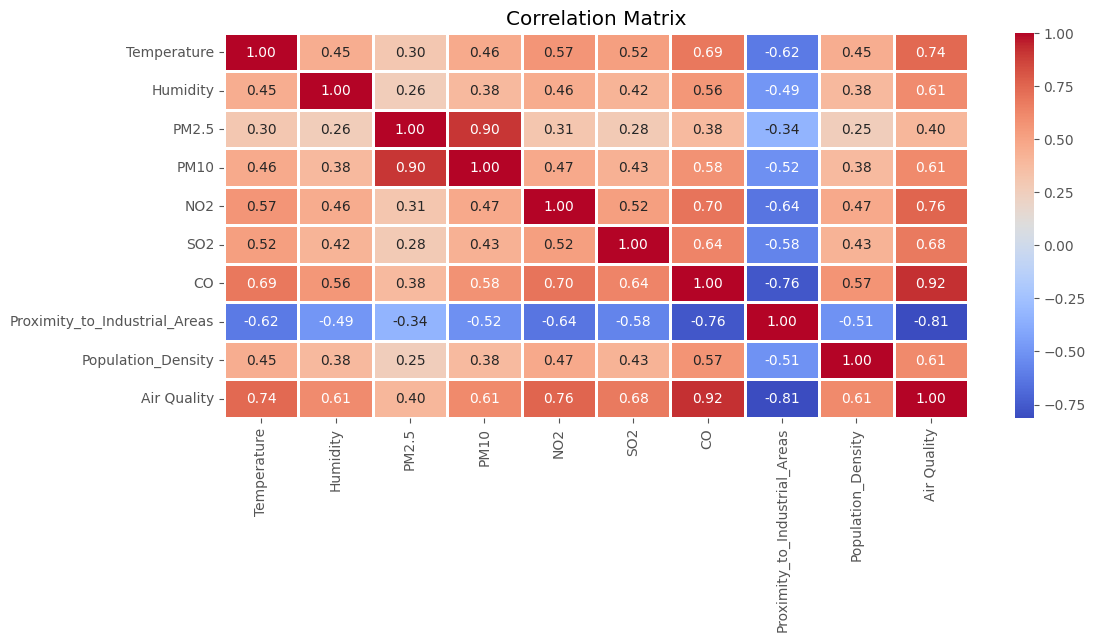

In [15]:
corr = df.corr(method="pearson")

plt.figure(figsize=(12, 5))

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)

plt.title("Correlation Matrix")

plt.show()

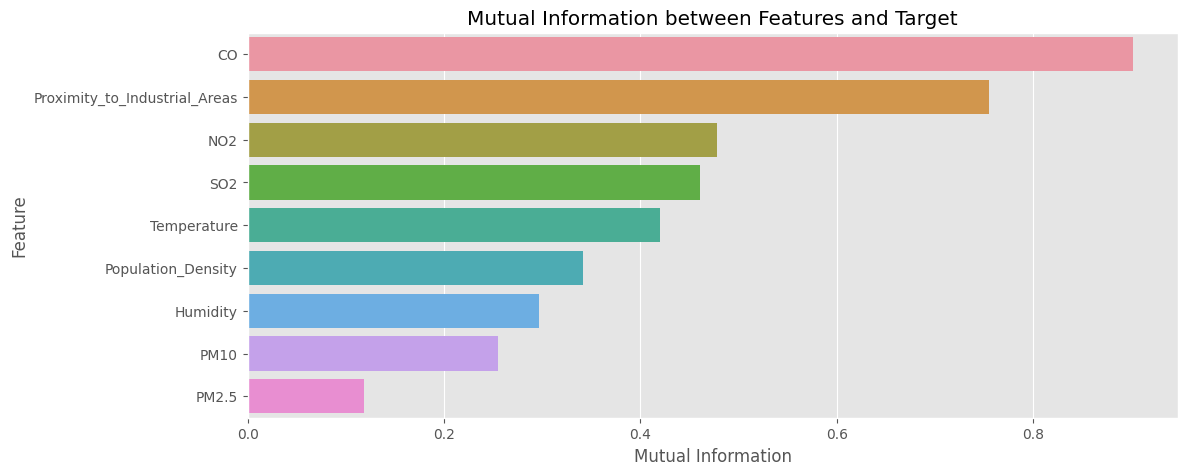

In [16]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop("Air Quality", axis=1)
y = df["Air Quality"]

mutual_info = mutual_info_classif(X, y)

mutual_info_df = pd.DataFrame(list(zip(X.columns, mutual_info)), columns=["Feature", "Mutual Info"])

mutual_info_df = mutual_info_df.sort_values(by="Mutual Info", ascending=False)

plt.figure(figsize=(12, 5))

sns.barplot(x=mutual_info_df["Mutual Info"], y=mutual_info_df["Feature"], orient="h")

plt.title("Mutual Information between Features and Target")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")

plt.show()


In [19]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=0)

model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

X, y = df.drop("Air Quality", axis=1), df["Air Quality"]

for group_feature in ["Population_Density", "Proximity_to_Industrial_Areas"]:
    print(f"Using group feature: {group_feature}")
    for train_index, test_index in cv.split(X, y, groups=df[group_feature]):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Score with {group_feature}: {model.score(X_test, y_test)}")


Using group feature: Population_Density
Score with Population_Density: 0.9519607843137254
Score with Population_Density: 0.9594059405940594
Score with Population_Density: 0.9524271844660194
Score with Population_Density: 0.944331983805668
Score with Population_Density: 0.9578947368421052
Using group feature: Proximity_to_Industrial_Areas
Score with Proximity_to_Industrial_Areas: 0.9489274770173647
Score with Proximity_to_Industrial_Areas: 0.9701754385964912
Score with Proximity_to_Industrial_Areas: 0.9467849223946785
Score with Proximity_to_Industrial_Areas: 0.9431072210065645
Score with Proximity_to_Industrial_Areas: 0.9510818438381938


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       0.95      0.98      0.96       321
           2       0.87      0.90      0.89       217
           3       0.89      0.76      0.82        86

    accuracy                           0.95      1063
   macro avg       0.93      0.91      0.92      1063
weighted avg       0.95      0.95      0.95      1063

